In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import optimize
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=20)

In [2]:
dpath = "/home/aghazary/Documents/StonerABCAData/"
with open(dpath+'U0.0KV0.0KDataABCAGrapheneABCNewParam.npy', 'rb') as f:
    a4ABCA = np.load(f)
dmu = 0.002
DlistABCA =3*np.arange(0,40.1,0.25)#np.arange(0,120.1,0.5)
mulABCA = np.arange(-150,150.0001,dmu)
mulABCA = mulABCA[1:-1]
nuTABCA = a4ABCA[:,1:-1]
dosABCA = (a4ABCA[:,2:]-a4ABCA[:,0:-2]) / (2*dmu)
fdtABCA = np.array([interp1d(nuTABCA[i], dosABCA[i], kind='linear') for i in range(len(nuTABCA))])
fdeABCA = np.array([interp1d(mulABCA,nuTABCA[i], kind='linear') for i in range(len(nuTABCA))])
fdrABCA = np.array([interp1d(nuTABCA[i],mulABCA, kind='linear') for i in range(len(nuTABCA))])

In [6]:
opath='/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/SuperABCA/Data/'
with open(opath + 'LambdaDepDtMulD60Elec1.npy', 'rb') as f:
            lmbT=np.load(f,allow_pickle=True)

In [56]:
lamdDe=[]
PsiDe=[]
xiMatDe=[]
DlistDe=np.array([6.5,13.5,25,42,60,69])
opath='/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/SuperABCA/Data/'
for Dlt in DlistDe:
    if Dlt != 60:
        try:
            with open(opath + 'LambdaDepDtMulD%sElec.npy'%(str(int(Dlt)) if Dlt-int(Dlt)<0.1 else str(int(Dlt))+'d'+str(int(10*(Dlt-int(Dlt))))), 'rb') as f:
                lmbT=np.load(f,allow_pickle=True)
            mulist=np.array([float(lmbT[0][i][1]) for i in range(len(lmbT[0]))])
            lmd4list=np.array([lmbT[1][i][0] for i in range(len(lmbT[1]))])
            lmd2list=np.array([lmbT[1][i][2] for i in range(len(lmbT[1]))])
            lamdDe.append([Dlt,mulist,lmd4list,lmd2list])
            psi4list=np.array([lmbT[1][i][1] for i in range(len(lmbT[1]))])
            psi2list=np.array([lmbT[1][i][3] for i in range(len(lmbT[1]))])
            sizes=np.array([lmbT[1][i][4] for i in range(len(lmbT[1]))])
            indsc=np.array([lmbT[1][i][5] for i in range(len(lmbT[1]))])
            PsiDe.append([Dlt, mulist,psi4list,psi2list,sizes,indsc])
            xiMat=np.array([lmbT[1][i][6] for i in range(len(lmbT[1]))])
            xiMatDe.append([Dlt,xiMat])
        except:
            print(r"File for $\Delta_1=%.1f$ not found" %(Dlt))
    else:
        with open(opath + 'LambdaDepDtMulD%sElec.npy'%(str(int(Dlt)) if Dlt-int(Dlt)<0.1 else str(int(Dlt))+'d'+str(int(10*(Dlt-int(Dlt))))), 'rb') as f:
                lmbT=np.load(f,allow_pickle=True)
        with open(opath + 'LambdaDepDtMulD%sElec1.npy'%(str(int(Dlt)) if Dlt-int(Dlt)<0.1 else str(int(Dlt))+'d'+str(int(10*(Dlt-int(Dlt))))), 'rb') as f:
                lmbT1=np.load(f,allow_pickle=True)
        mulist=np.array([[float(lmbT[0][i][1]), float(lmbT1[0][i][1])]  for i in range(len(lmbT[0]))])
        lmd4list=np.array([[lmbT[1][i][0], lmbT1[1][i][0]] for i in range(len(lmbT[1]))])
        lmd2list=np.array([[lmbT[1][i][2], lmbT1[1][i][2]]for i in range(len(lmbT[1]))])
        lamdDe.append([Dlt,mulist.ravel(),lmd4list.reshape(-1,4),lmd2list.reshape(-1,4)])
        psi4list=np.array([[lmbT[1][i][1], lmbT1[1][i][1]] for i in range(len(lmbT[1]))])
        psi2list=np.array([[lmbT[1][i][3], lmbT1[1][i][3]]  for i in range(len(lmbT[1]))])
        sizes=np.array([[lmbT[1][i][4], lmbT1[1][i][4]] for i in range(len(lmbT[1]))])
        indsc=np.array([[lmbT[1][i][5], lmbT1[1][i][5]] for i in range(len(lmbT[1]))])
        PsiDe.append([Dlt, mulist.ravel(),psi4list.reshape(-1,),psi2list.reshape(-1,),sizes.reshape(-1,),indsc.reshape(-1,)])
        xiMat=np.array([[lmbT[1][i][6], lmbT1[1][i][6]] for i in range(len(lmbT[1]))])
        xiMatDe.append([Dlt,xiMat])
DlmbListe = np.array([lamdDe[i][0] for i in range(len(lamdDe))])

In [4]:
lamdDh=[]
PsiDh=[]
xiMatDh=[]
DlistDh=np.array([20,40,60])
opath='/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/SuperABCA/Data/'
for Dlt in DlistDh:
    try:
        with open(opath + 'LambdaDepDtMulD%s.npy'%(str(int(Dlt)) if Dlt-int(Dlt)<0.1 else str(int(Dlt))+'d'+str(int(10*(Dlt-int(Dlt))))), 'rb') as f:
            lmbT=np.load(f,allow_pickle=True)
        mulist=np.array([float(lmbT[0][i][1]) for i in range(len(lmbT[0]))])
        lmd4list=np.array([lmbT[1][i][0] for i in range(len(lmbT[1]))])
        lmd2list=np.array([lmbT[1][i][2] for i in range(len(lmbT[1]))])
        lamdDh.append([Dlt,mulist,lmd4list,lmd2list])
        psi4list=np.array([lmbT[1][i][1] for i in range(len(lmbT[1]))])
        psi2list=np.array([lmbT[1][i][3] for i in range(len(lmbT[1]))])
        sizes=np.array([lmbT[1][i][4] for i in range(len(lmbT[1]))])
        indsc=np.array([lmbT[1][i][5] for i in range(len(lmbT[1]))])
        PsiDh.append([Dlt, mulist,psi4list,psi2list,sizes,indsc])
        xiMat=np.array([lmbT[1][i][6] for i in range(len(lmbT[1]))])
        xiMatDh.append([Dlt,xiMat])
    except:
        print(r"File for $\Delta_1=%.1f$ not found" %(Dlt))
DlmbListh = np.array([lamdDe[i][0] for i in range(len(lamdDe))])

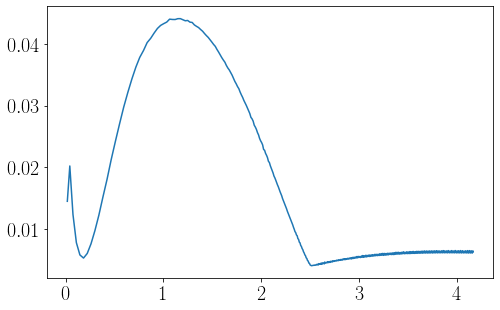

In [6]:
plt.plot(fdeABCA[80](lamdDe[1][1]),-lamdDe[1][2][:,0],label=r'$N=4$')

In [68]:
lamdDe[0][1][2+np.argmax(-lamdDe[0][3][2:,0])]

20.379999999999942

In [12]:
inde = np.where(np.abs(np.abs(20)-DlmbListe)<0.01)[0][0]
lamdDe[inde][1]

array([59.74, 59.76, 59.78, ..., 79.94, 79.96, 79.98])

In [58]:
U = 15000
V = 4500

In [59]:
a=2.46
dmu = 0.005
mul = np.arange(-120,120.0001,dmu)
xrescale = np.sqrt(3) * a**2 * 1E-4/ 2
with open(dpath+'U%.1fKV%.1fKDataABCAT01.npy' 
     % (U / 1000, np.abs(V) / 1000), 'rb') as f:
    a4 = np.load(f)
nuT = np.sum(a4[:,1:-1,:4], axis=2) / xrescale
nu1, nu2, nu3, nu4 = np.transpose(np.sort(a4[:,1:-1,:4], axis=2), (2,0,1)) / xrescale
dos = (np.sum(a4[:,2:,:4], axis=2)-np.sum(a4[:,0:-2,:4], axis=2)) / (2*dmu*xrescale)

In [60]:
from scipy.signal import savgol_filter
doso = dos.copy()
for i in range(len(doso)):
    dos[i] = savgol_filter(doso[i], 15, 3)

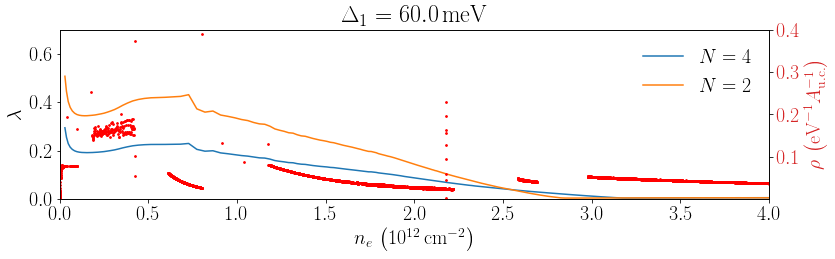

In [61]:
ml.rcParams['figure.figsize'] = (12.0, 4.0)
ml.rc('font', family='serif',size=20)
fig, ax=plt.subplots(1,1)
Dl=60
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inde = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
#indh = np.where(np.abs(np.abs(Dl)-DlmbListh)<0.01)[0][0]
#ax.plot(np.concatenate((np.flip(fdeABCA[ind](-lamdDh[indh][1])),fdeABCA[ind](lamdDe[inde][1]))),
#                  np.concatenate((np.flip(-lamdDh[indh][2][:,0]),-lamdDe[inde][2][:,0])),label=r'$N=4$')
ax.plot(fdeABCA[ind](lamdDe[inde][1]),-lamdDe[inde][2][:,0],label=r'$N=4$')
ax.plot(fdeABCA[ind](lamdDe[inde][1]),-lamdDe[inde][3][:,0],label=r'$N=2$')
#ax.plot(fdeABCA[ind](-lamdDh[indh][1]),-lamdDh[inde][2][:,0],label=r'$N=4$')
#ax.plot(fdeABCA[ind](-lamdDh[indh][1]),-lamdDh[inde][3][:,0],label=r'$N=2$')
#ax.plot(np.concatenate((np.flip(fdeABCA[ind](-lamdDh[indh][1])),fdeABCA[ind](lamdDe[inde][1]))),
#                  np.concatenate((np.flip(-lamdDh[indh][3][:,0]),-lamdDe[inde][3][:,0])),label=r'$N=2$')
ax.set_xlim([0.0,4.0])
ax.set_ylim([0,0.7])
ax.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=20)
ax.set_ylabel(r"$\lambda$", fontsize=20)
ax.set_title('$\Delta_1=%.1f\,\mathrm{meV}$' %(Dl))
ax.legend(frameon=False,fontsize=20)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

a=2.46
Au = np.sqrt(3) * a**2 / 2
color = 'tab:red'
ax2.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$', color=color)
ax2.scatter(nuT[ind],Au*0.1*dos[ind],s=3,color='r')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks([0.1,0.2,0.3,0.4])
ax2.set_ylim([0,0.4])

plt.tight_layout()
plt.savefig("Sup20ABCA.png",dpi=200)

(1.3, 1.6)

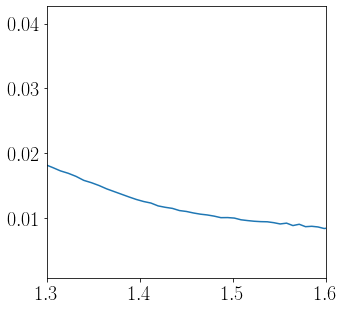

In [80]:
plt.plot(fdeABCA[40](lamdDe[0][1]),-lamdDe[0][3][:,0])
plt.xlim([1.3,1.6])

In [18]:
lamdDe[2][1][0]

56.27

In [16]:
-lamdDe[2][2][12,0]

0.3421690631459744

In [63]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
g2 = -15
g5 = 50
Dt2 = 0.0#-2.3
Dt3=0.0
Dtp = 10.5

In [64]:
def getBMatrixABCA(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [0*idt, 0*idt, -v4*p, g1*idt,(-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, -v4*p, g1*idt, (Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [65]:
def func(k,th, Dt1, mu):
    w =np.linalg.eigvalsh(getBMatrixABCA(k*np.cos(th), k*np.sin(th), Dt1, mu, 1))
    return w[4]

def func1(k0x, k0y, k, th, Dt1, mu):
    w =np.linalg.eigvalsh(getBMatrixABCA(k0x+k*np.cos(th), k0y+k*np.sin(th), Dt1, mu, 1))
    return w[4]

def catch(func, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except RuntimeError:
        return None
    except ValueError:
        return None

In [10]:
kmax=0.20

def kp(Dl, muc,sizes, indsc):
    NFS=100
    thr = np.linspace(-np.pi,np.pi,NFS,endpoint=False)
    if len(sizes)==1:
        innerpocket = 2
    elif len(sizes)==2:
        innerpocket = 1
    elif len(sizes)==3:
        innerpocket = 0
    else:
        innerpocket=3
   
    pref=3#1.9
    prefm=1.8
    if innerpocket==0:
        k1 = catch(optimize.newton,lambda k:func(k,0, Dl, muc), kmax)
        k1m = catch(optimize.newton,lambda k:func(k,0, Dl, muc), -kmax)
        if k1!=None and k1>0:
            kb=k1-0.001
            kl = k1
        else:
            kb=k1m+0.001
            kl=k1m
        k0 = optimize.brentq(lambda k:func(k,0, Dl, muc), 0.0, kb)
        kc = 0.5*(k0+kl)
        kt = optimize.newton(lambda k:func1(kc,0,k,np.pi/2, Dl, muc), 0.02)
        k01 = np.array([[th, optimize.brentq(lambda k:func1(kc, 0,k,th, Dl, muc), 0, pref*kt)] for th in thr[indsc[:sizes[0]]]])
        k11 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[0]:sizes[1]]]])
        k21 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[1]:sizes[2]]]])
        krx = np.concatenate((kc+k01[:,1]*np.cos(k01[:,0]), kc*np.cos(2*np.pi/3)+k11[:,1]*np.cos(k11[:,0]),kc*np.cos(2*np.pi/3)+k21[:,1]*np.cos(k21[:,0])))
        kry = np.concatenate((k01[:,1]*np.sin(k01[:,0]), kc*np.sin(2*np.pi/3)+k11[:,1]*np.sin(k11[:,0]),kc*np.sin(-2*np.pi/3)+k21[:,1]*np.sin(k21[:,0])))
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2),
            np.sqrt((krx[sizes[0]:sizes[1]]-np.concatenate((krx[sizes[0]+1:sizes[1]],[krx[sizes[0]]])))**2+(kry[sizes[0]:sizes[1]]-np.concatenate((kry[sizes[0]+1:sizes[1]],[kry[sizes[0]]])))**2),
            np.sqrt((krx[sizes[1]:]-np.concatenate((krx[sizes[1]+1:],[krx[sizes[1]]])))**2+(kry[sizes[1]:]-np.concatenate((kry[sizes[1]+1:],[kry[sizes[1]]])))**2)))
    elif innerpocket==3:
        k1 = catch(optimize.newton,lambda k:func(k,0, Dl, muc), kmax)
        k1m = catch(optimize.newton,lambda k:func(k,0, Dl, muc), -kmax)
        k0 = optimize.brentq(lambda k:func(k,0, Dl, muc), 0.0, k1-0.0001)
        kc = 0.5*(k0+k1)
        kt = optimize.newton(lambda k:func1(kc,0,k,np.pi/2, Dl, muc), 0.0)
        k0m = optimize.brentq(lambda k:func(k,0, Dl, muc), 0.0, k1m+0.0001)
        kcm = 0.5*(k0m+k1m)
        ktm = optimize.newton(lambda k:func1(kcm,0,k,np.pi/2, Dl, muc), 0.0)
        k01 = np.array([[th, optimize.brentq(lambda k:func1(kc, 0,k,th, Dl, muc), 0, pref*kt)] for th in thr[indsc[:sizes[0]]]])
        k11 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[0]:sizes[1]]]])
        k21 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[1]:sizes[2]]]])
        k01m = np.array([[th, optimize.brentq(lambda k:func1(kcm, 0,k,th, Dl, muc), 0, prefm*ktm)] for th in thr[indsc[sizes[2]:sizes[3]]]])
        k11m = np.array([[th, optimize.brentq(lambda k:func1(kcm*np.cos(2*np.pi/3), kcm*np.sin(2*np.pi/3),k,th,Dl,muc), 0, prefm*ktm)] for th in thr[indsc[sizes[3]:sizes[4]]]])
        k21m = np.array([[th, optimize.brentq(lambda k:func1(kcm*np.cos(2*np.pi/3), kcm*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, prefm*ktm)] for th in thr[indsc[sizes[4]:sizes[5]]]])
        krx = np.concatenate((kc+k01[:,1]*np.cos(k01[:,0]), kc*np.cos(2*np.pi/3)+k11[:,1]*np.cos(k11[:,0]),kc*np.cos(2*np.pi/3)+k21[:,1]*np.cos(k21[:,0]),
                              kcm+k01m[:,1]*np.cos(k01m[:,0]), kcm*np.cos(2*np.pi/3)+k11m[:,1]*np.cos(k11m[:,0]),kcm*np.cos(2*np.pi/3)+k21m[:,1]*np.cos(k21m[:,0])))
        kry = np.concatenate((k01[:,1]*np.sin(k01[:,0]), kc*np.sin(2*np.pi/3)+k11[:,1]*np.sin(k11[:,0]),kc*np.sin(-2*np.pi/3)+k21[:,1]*np.sin(k21[:,0]),
                              k01m[:,1]*np.sin(k01m[:,0]), kcm*np.sin(2*np.pi/3)+k11m[:,1]*np.sin(k11m[:,0]),kcm*np.sin(-2*np.pi/3)+k21m[:,1]*np.sin(k21m[:,0])))         
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2),
            np.sqrt((krx[sizes[0]:sizes[1]]-np.concatenate((krx[sizes[0]+1:sizes[1]],[krx[sizes[0]]])))**2+(kry[sizes[0]:sizes[1]]-np.concatenate((kry[sizes[0]+1:sizes[1]],[kry[sizes[0]]])))**2),
            np.sqrt((krx[sizes[1]:sizes[2]]-np.concatenate((krx[sizes[1]+1:sizes[2]],[krx[sizes[1]]])))**2+(kry[sizes[1]:sizes[2]]-np.concatenate((kry[sizes[1]+1:sizes[2]],[kry[sizes[1]]])))**2),
            np.sqrt((krx[sizes[2]:sizes[3]]-np.concatenate((krx[sizes[2]+1:sizes[3]],[krx[sizes[2]]])))**2+(kry[sizes[2]:sizes[3]]-np.concatenate((kry[sizes[2]+1:sizes[3]],[kry[sizes[2]]])))**2),
            np.sqrt((krx[sizes[3]:sizes[4]]-np.concatenate((krx[sizes[3]+1:sizes[4]],[krx[sizes[3]]])))**2+(kry[sizes[3]:sizes[4]]-np.concatenate((kry[sizes[3]+1:sizes[4]],[kry[sizes[3]]])))**2),
            np.sqrt((krx[sizes[4]:sizes[5]]-np.concatenate((krx[sizes[4]+1:sizes[5]],[krx[sizes[4]]])))**2+(kry[sizes[4]:sizes[5]]-np.concatenate((kry[sizes[4]+1:sizes[5]],[kry[sizes[4]]])))**2)))
    elif innerpocket==1:
        kol = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), kmax)] for th in thr[indsc[:sizes[0]]]])
        ko = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), kmax)] for th in thr[indsc[sizes[0]:sizes[1]]]])
        ki = np.array([[th[0],optimize.brentq(lambda k:func(k,th[0], Dl, muc), 0.0002, th[1]-0.00001)] for th in zip(thr[indsc[:sizes[0]]], kol[:,1])])
        krx = np.concatenate((ki[:,1]*np.cos(ki[:,0]), ko[:,1]*np.cos(ko[:,0])))
        kry = np.concatenate((ki[:,1]*np.sin(ki[:,0]), ko[:,1]*np.sin(ko[:,0])))
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2), 
        np.sqrt((krx[sizes[0]:]-np.concatenate((krx[sizes[0]+1:],[krx[sizes[0]]])))**2+(kry[sizes[0]:]-np.concatenate((kry[sizes[0]+1:],[kry[sizes[0]]])))**2)))
    else:
        ko = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), kmax)] for th in thr[indsc[:sizes[0]]]])
        krx = ko[:,1]*np.cos(ko[:,0])
        kry = ko[:,1]*np.sin(ko[:,0])
        dk=np.sqrt((krx-np.concatenate((krx[1:],[krx[0]])))**2+(kry[:]-np.concatenate((kry[1:],[kry[0]])))**2)
    
    return krx, kry, dk, innerpocket

In [11]:
def plotOrderAng(Dl,mu,PsiD,lamdD, phase,ax):
    indl = np.where(np.abs(DlmbListe-Dl)<0.01)[0][0]
    ind=np.where(PsiD[indl][1]-mu>=0)[0][0]
    sizes=PsiD[indl][4][ind]
    indsc=PsiD[indl][5][ind]
    print(mu,'\t',PsiD[indl][1][ind], lamdD[indl][3][ind])
    kpl=kp(Dl,mu,sizes,indsc)
    if phase!=None:
        psil=(np.cos(phase)*PsiD[indl][3][ind][:,0]+np.sin(phase)*PsiD[indl][3][ind][:,1])/np.linalg.norm(np.cos(phase)*PsiD[indl][3][ind][:,0]+np.sin(phase)*PsiD[indl][3][ind][:,1])
    else:
        psil=PsiD[indl][3][ind][:,0]*PsiD[indl][3][ind][:,0].shape[0]/np.linalg.norm(PsiD[indl][3][ind][:,0])
    thr = np.linspace(-np.pi,np.pi,100,endpoint=False)
    if kpl[3]==2:  
        ax.plot(thr[indsc[0:sizes[0]]]/np.pi, psil[0:sizes[0]],label="Pocket")
    elif kpl[3]==1:
        ax.plot(thr[indsc[0:sizes[0]]]/np.pi, psil[0:sizes[0]],label="Inner")
        ax.plot(thr[indsc[sizes[0]:sizes[1]]]/np.pi, psil[sizes[0]:sizes[1]],label="Outer")
    elif kpl[3]==0:
        ax.plot(thr[indsc[0:sizes[0]]]/np.pi, psil[0:sizes[0]],label="Pocket 0")
        ax.plot(thr[indsc[sizes[0]:sizes[1]]]/np.pi, psil[sizes[0]:sizes[1]],label=r"Pocket $2\pi/3$")
        ax.plot(thr[indsc[sizes[1]:sizes[2]]]/np.pi, psil[sizes[1]:sizes[2]],label=r"Pocket $-2\pi/3$")
    else:
        ax.plot(thr[indsc[0:sizes[0]]]/np.pi, psil[0:sizes[0]],label="Pocket 0")
        ax.plot(thr[indsc[sizes[0]:sizes[1]]]/np.pi, psil[sizes[0]:sizes[1]],label=r"Pocket $2\pi/3$")
        ax.plot(thr[indsc[sizes[1]:sizes[2]]]/np.pi, psil[sizes[1]:sizes[2]],label=r"Pocket $-2\pi/3$")
        ax.plot(thr[indsc[sizes[2]:sizes[3]]]/np.pi, psil[sizes[2]:sizes[3]],label=r"Pocket $\pi$")
        ax.plot(thr[indsc[sizes[3]:sizes[4]]]/np.pi, psil[sizes[3]:sizes[4]],label=r"Pocket $\pi/3$")
        ax.plot(thr[indsc[sizes[4]:sizes[5]]]/np.pi, psil[sizes[4]:sizes[5]],label=r"Pocket $-\pi/3$")

20.796577506563178 	 20.819999999999972 [-0.01217878 -0.01215501 -0.00211752 -0.00179658]
25.51576854349209 	 25.53999999999987 [-0.00883677 -0.00868029 -0.00639375 -0.0039253 ]
38.90805633345834 	 38.939999999999586 [-0.00434924 -0.00419818 -0.00281722 -0.00271669]


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


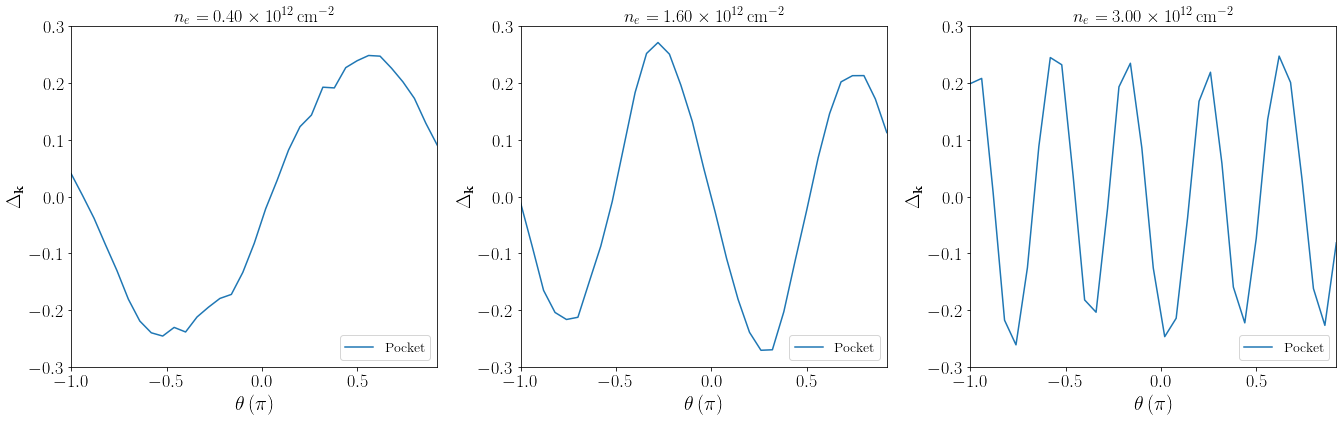

In [21]:
from matplotlib.gridspec import GridSpec
Dl=6.5
nul=[0.4,1.6,3]
PsiD=PsiDe
lamdD=lamdDe
ind = np.where(np.abs(DlistABCA-Dl)<0.01)[0][0]
mull= np.array(fdrABCA[ind](nul))

ml.rc('font', family='serif',size=18)
ml.rcParams['figure.figsize'] = (19.0, 6.2)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3)

mu1=mull[0]
ax1=fig.add_subplot(gs[0,0])
plotOrderAng(Dl,mu1,PsiD,lamdD,1.1,ax1)
ax1.set_xlabel(r"$\theta\left(\pi\right)$", fontsize=20)
ax1.set_ylabel(r"$\Delta_\mathbf{k}$", fontsize=20)
ax1.set_xlim([-1,0.92])
ax1.set_ylim([-0.3,0.3])
ax1.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(nul[0]),fontsize=18)
ax1.legend(loc="lower right",fontsize=14)

mu2=mull[1]
ax2=fig.add_subplot(gs[0,1])
plotOrderAng(Dl,mu2,PsiD,lamdD,0.0,ax2)
ax2.set_xlabel(r"$\theta\left(\pi\right)$", fontsize=20)
ax2.set_ylabel(r"$\Delta_\mathbf{k}$", fontsize=20)
ax2.set_xlim([-1,0.92])
ax2.set_ylim([-0.3,0.3])
ax2.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(nul[1]),fontsize=18)
ax2.legend(loc="lower right",fontsize=14)

mu3=mull[2]
ax3=fig.add_subplot(gs[0,2])
plotOrderAng(Dl,mu3,PsiD,lamdD,0.45,ax3)
ax3.set_xlabel(r"$\theta\left(\pi\right)$", fontsize=20)
ax3.set_ylabel(r"$\Delta_\mathbf{k}$", fontsize=20)
ax3.set_xlim([-1,0.92])
ax3.set_ylim([-0.3,0.3])
ax3.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(nul[2]),fontsize=18)
ax3.legend(loc="lower right",fontsize=14)

plt.tight_layout()

In [ ]:
catch(optimize.newton,lambda k:func(k,0, 69, muc), kmax)

In [66]:
kmax=0.20

def kp(Dl, muc,sizes, indsc):
    NFS=100
    thr = np.linspace(-np.pi,np.pi,NFS,endpoint=False)
    if len(sizes)==1:
        innerpocket = 4
    elif len(sizes)==2:
        innerpocket = 1
    elif len(sizes)==3:
        innerpocket = 0
    elif len(sizes)==4:
        innerpocket = 2
    else:
        innerpocket=3
   
    pref=3#1.9
    prefm=1.8
    if innerpocket==0:
        k1 = catch(optimize.newton,lambda k:func(k,0, Dl, muc), kmax)
        k1m = catch(optimize.newton,lambda k:func(k,0, Dl, muc), -kmax)
        print(k1,'\t',k1m)
        if k1!=None and k1>0:
            kb=k1-0.001
            kl = k1
        else:
            kb=k1m+0.001
            kl=k1m
        k0 = optimize.brentq(lambda k:func(k,0, Dl, muc), 0.0, kb)
        kc = 0.5*(k0+kl)
        kt = optimize.newton(lambda k:func1(kc,0,k,np.pi/2, Dl, muc), 0.02)
        k01 = np.array([[th, optimize.brentq(lambda k:func1(kc, 0,k,th, Dl, muc), 0, pref*kt)] for th in thr[indsc[:sizes[0]]]])
        k11 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[0]:sizes[1]]]])
        k21 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[1]:sizes[2]]]])
        krx = np.concatenate((kc+k01[:,1]*np.cos(k01[:,0]), kc*np.cos(2*np.pi/3)+k11[:,1]*np.cos(k11[:,0]),kc*np.cos(2*np.pi/3)+k21[:,1]*np.cos(k21[:,0])))
        kry = np.concatenate((k01[:,1]*np.sin(k01[:,0]), kc*np.sin(2*np.pi/3)+k11[:,1]*np.sin(k11[:,0]),kc*np.sin(-2*np.pi/3)+k21[:,1]*np.sin(k21[:,0])))
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2),
            np.sqrt((krx[sizes[0]:sizes[1]]-np.concatenate((krx[sizes[0]+1:sizes[1]],[krx[sizes[0]]])))**2+(kry[sizes[0]:sizes[1]]-np.concatenate((kry[sizes[0]+1:sizes[1]],[kry[sizes[0]]])))**2),
            np.sqrt((krx[sizes[1]:]-np.concatenate((krx[sizes[1]+1:],[krx[sizes[1]]])))**2+(kry[sizes[1]:]-np.concatenate((kry[sizes[1]+1:],[kry[sizes[1]]])))**2)))
    elif innerpocket==3:
        k1 = catch(optimize.newton,lambda k:func(k,0, Dl, muc), kmax)
        k1m = catch(optimize.newton,lambda k:func(k,0, Dl, muc), -kmax)
        k0 = optimize.brentq(lambda k:func(k,0, Dl, muc), 0.0, k1-0.0001)
        kc = 0.5*(k0+k1)
        kt = optimize.newton(lambda k:func1(kc,0,k,np.pi/2, Dl, muc), 0.0)
        k0m = optimize.brentq(lambda k:func(k,0, Dl, muc), 0.0, k1m+0.0001)
        kcm = 0.5*(k0m+k1m)
        ktm = optimize.newton(lambda k:func1(kcm,0,k,np.pi/2, Dl, muc), 0.0)
        k01 = np.array([[th, optimize.brentq(lambda k:func1(kc, 0,k,th, Dl, muc), 0, pref*kt)] for th in thr[indsc[:sizes[0]]]])
        k11 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[0]:sizes[1]]]])
        k21 = np.array([[th, optimize.brentq(lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr[indsc[sizes[1]:sizes[2]]]])
        k01m = np.array([[th, optimize.brentq(lambda k:func1(kcm, 0,k,th, Dl, muc), 0, prefm*ktm)] for th in thr[indsc[sizes[2]:sizes[3]]]])
        k11m = np.array([[th, optimize.brentq(lambda k:func1(kcm*np.cos(2*np.pi/3), kcm*np.sin(2*np.pi/3),k,th,Dl,muc), 0, prefm*ktm)] for th in thr[indsc[sizes[3]:sizes[4]]]])
        k21m = np.array([[th, optimize.brentq(lambda k:func1(kcm*np.cos(2*np.pi/3), kcm*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, prefm*ktm)] for th in thr[indsc[sizes[4]:sizes[5]]]])
        krx = np.concatenate((kc+k01[:,1]*np.cos(k01[:,0]), kc*np.cos(2*np.pi/3)+k11[:,1]*np.cos(k11[:,0]),kc*np.cos(2*np.pi/3)+k21[:,1]*np.cos(k21[:,0]),
                              kcm+k01m[:,1]*np.cos(k01m[:,0]), kcm*np.cos(2*np.pi/3)+k11m[:,1]*np.cos(k11m[:,0]),kcm*np.cos(2*np.pi/3)+k21m[:,1]*np.cos(k21m[:,0])))
        kry = np.concatenate((k01[:,1]*np.sin(k01[:,0]), kc*np.sin(2*np.pi/3)+k11[:,1]*np.sin(k11[:,0]),kc*np.sin(-2*np.pi/3)+k21[:,1]*np.sin(k21[:,0]),
                              k01m[:,1]*np.sin(k01m[:,0]), kcm*np.sin(2*np.pi/3)+k11m[:,1]*np.sin(k11m[:,0]),kcm*np.sin(-2*np.pi/3)+k21m[:,1]*np.sin(k21m[:,0])))         
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2),
            np.sqrt((krx[sizes[0]:sizes[1]]-np.concatenate((krx[sizes[0]+1:sizes[1]],[krx[sizes[0]]])))**2+(kry[sizes[0]:sizes[1]]-np.concatenate((kry[sizes[0]+1:sizes[1]],[kry[sizes[0]]])))**2),
            np.sqrt((krx[sizes[1]:sizes[2]]-np.concatenate((krx[sizes[1]+1:sizes[2]],[krx[sizes[1]]])))**2+(kry[sizes[1]:sizes[2]]-np.concatenate((kry[sizes[1]+1:sizes[2]],[kry[sizes[1]]])))**2),
            np.sqrt((krx[sizes[2]:sizes[3]]-np.concatenate((krx[sizes[2]+1:sizes[3]],[krx[sizes[2]]])))**2+(kry[sizes[2]:sizes[3]]-np.concatenate((kry[sizes[2]+1:sizes[3]],[kry[sizes[2]]])))**2),
            np.sqrt((krx[sizes[3]:sizes[4]]-np.concatenate((krx[sizes[3]+1:sizes[4]],[krx[sizes[3]]])))**2+(kry[sizes[3]:sizes[4]]-np.concatenate((kry[sizes[3]+1:sizes[4]],[kry[sizes[3]]])))**2),
            np.sqrt((krx[sizes[4]:sizes[5]]-np.concatenate((krx[sizes[4]+1:sizes[5]],[krx[sizes[4]]])))**2+(kry[sizes[4]:sizes[5]]-np.concatenate((kry[sizes[4]+1:sizes[5]],[kry[sizes[4]]])))**2)))
    elif innerpocket==2:
        pref=5
        thl=np.array([0,np.pi])
        kxlr = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), 1.2*kmax)] for th in thl])
        k00 = np.array([[th, catch(optimize.brentq,lambda k:func(k,th, Dl, muc), 0, kxlr[1,1]+0.01)] for th in thr])
        k0 = optimize.brentq(lambda k:func(k,0, Dl, muc), k00[NFS//2,1]+0.0001, kxlr[0,1]-0.001)
        kc = 0.5*(k0+kxlr[0,1])
        kt = optimize.newton(lambda k:func1(kc,0,k,np.pi/2, Dl, muc), 0.001)
        k01 = np.array([[th, catch(optimize.brentq,lambda k:func1(kc, 0,k,th, Dl, muc), 0, pref*kt)] for th in thr])
        k11 = np.array([[th, catch(optimize.brentq,lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr])
        k21 = np.array([[th, catch(optimize.brentq,lambda k:func1(kc*np.cos(2*np.pi/3), kc*np.sin(-2*np.pi/3),k,th,Dl,muc), 0, pref*kt)] for th in thr])
        #print(k11.shape)
        k00 = k00[indsc[:sizes[0]]]
        k01 = k01[indsc[sizes[0]:sizes[1]]]
        k11 = k11[indsc[sizes[1]:sizes[2]]]
        k21 = k21[indsc[sizes[2]:]]
        krx = np.concatenate((k00[:,1]*np.cos(k00[:,0]), kc+k01[:,1]*np.cos(k01[:,0]), 
                              kc*np.cos(2*np.pi/3)+k11[:,1]*np.cos(k11[:,0]), kc*np.cos(2*np.pi/3)+k21[:,1]*np.cos(k21[:,0])))
        kry = np.concatenate((k00[:,1]*np.sin(k00[:,0]), k01[:,1]*np.sin(k01[:,0]),
                              kc*np.sin(2*np.pi/3)+k11[:,1]*np.sin(k11[:,0]), kc*np.sin(-2*np.pi/3)+k21[:,1]*np.sin(k21[:,0])))
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2),
                           np.sqrt((krx[sizes[0]:sizes[1]]-np.concatenate((krx[sizes[0]+1:sizes[1]],[krx[sizes[0]]])))**2+(kry[sizes[0]:sizes[1]]-np.concatenate((kry[sizes[0]+1:sizes[1]],[kry[sizes[0]]])))**2),
                           np.sqrt((krx[sizes[1]:sizes[2]]-np.concatenate((krx[sizes[1]+1:sizes[2]],[krx[sizes[1]]])))**2+(kry[sizes[1]:sizes[2]]-np.concatenate((kry[sizes[1]+1:sizes[2]],[kry[sizes[1]]])))**2),
                           np.sqrt((krx[sizes[2]:]-np.concatenate((krx[sizes[2]+1:],[krx[sizes[2]]])))**2+(kry[sizes[2]:]-np.concatenate((kry[sizes[2]+1:],[kry[sizes[2]]])))**2)))
    elif innerpocket==1:
        kol = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), kmax)] for th in thr[indsc[:sizes[0]]]])
        ko = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), kmax)] for th in thr[indsc[sizes[0]:sizes[1]]]])
        ki = np.array([[th[0],optimize.brentq(lambda k:func(k,th[0], Dl, muc), 0.0002, th[1]-0.00001)] for th in zip(thr[indsc[:sizes[0]]], kol[:,1])])
        krx = np.concatenate((ki[:,1]*np.cos(ki[:,0]), ko[:,1]*np.cos(ko[:,0])))
        kry = np.concatenate((ki[:,1]*np.sin(ki[:,0]), ko[:,1]*np.sin(ko[:,0])))
        dk=np.concatenate((np.sqrt((krx[:sizes[0]]-np.concatenate((krx[1:sizes[0]],[krx[0]])))**2+(kry[:sizes[0]]-np.concatenate((kry[1:sizes[0]],[kry[0]])))**2), 
        np.sqrt((krx[sizes[0]:]-np.concatenate((krx[sizes[0]+1:],[krx[sizes[0]]])))**2+(kry[sizes[0]:]-np.concatenate((kry[sizes[0]+1:],[kry[sizes[0]]])))**2)))
    else:
        #ko = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), kmax)] for th in thr[indsc[:sizes[0]]]])
        ko = np.array([[th, catch(optimize.brentq, lambda k:func(k,th, Dl, muc), 0, kmax)] for th in thr[indsc[:sizes[0]]]])
        #print(ko)
        krx = ko[:,1]*np.cos(ko[:,0])
        kry = ko[:,1]*np.sin(ko[:,0])
        dk=np.sqrt((krx-np.concatenate((krx[1:],[krx[0]])))**2+(kry[:]-np.concatenate((kry[1:],[kry[0]])))**2)
    
    return krx, kry, dk, innerpocket

In [67]:
def FSOrder(i0,NFS,krx,kry,psi,ax):
    c1=col5
    c2=col6
    #mult = 0.6
    for i in range(NFS-1):
        ax.plot(krx[i0+i:i0+i+2],kry[i0+i:i0+i+2], lw=np.abs(mult*0.5*(psi[i0+i]+psi[i0+i+1])), c=c1 if 0.5*(psi[i0+i]+psi[i0+i+1])>0 else c2)
    ax.plot([krx[i0+NFS-1],krx[i0]],[kry[i0+NFS-1],kry[i0]], lw=np.abs(mult*0.5*(psi[i0+NFS-1]+psi[i0])), c=c1 if 0.5*(psi[i0+NFS-1]+psi[i0])>0 else c2)

def plotOrder(Dl,mu,PsiD,phase,ax,fp):
    indl = np.where(np.abs(DlmbListe-Dl)<0.01)[0][0]
    ind=np.where(PsiD[indl][1]-mu>=0)[0][0]
    sizes=PsiD[indl][4][ind]
    indsc=PsiD[indl][5][ind]
    print(mu,'\t',PsiD[indl][1][ind])
    kpl=kp(Dl,PsiD[indl][1][ind],sizes,indsc)
    indfp = 2 if fp else 3
    if phase!=None:
        psil=(np.cos(phase)*PsiD[indl][indfp][ind][:,0]+np.sin(phase)*PsiD[indl][indfp][ind][:,1])*PsiD[indl][indfp][ind][:,0].shape[0]/np.linalg.norm(np.cos(phase)*PsiD[indl][indfp][ind][:,0]+np.sin(phase)*PsiD[indl][indfp][ind][:,1])
    else:
        psil=PsiD[indl][indfp][ind][:,0]*PsiD[indl][indfp][ind][:,0].shape[0]/np.linalg.norm(PsiD[indl][indfp][ind][:,0])
    krx = kpl[0]
    kry = kpl[1]
    if kpl[3]==4:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
    elif kpl[3]==1:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
    elif kpl[3]==0:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[1],sizes[2]-sizes[1],krx,kry,psil,ax)
    elif kpl[3]==2:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[1],sizes[2]-sizes[1],krx,kry,psil,ax)
        FSOrder(sizes[2],sizes[3]-sizes[2],krx,kry,psil,ax)
    else:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[1],sizes[2]-sizes[1],krx,kry,psil,ax)
        FSOrder(sizes[2],sizes[3]-sizes[2],krx,kry,psil,ax)
        FSOrder(sizes[3],sizes[4]-sizes[3],krx,kry,psil,ax)
        FSOrder(sizes[4],sizes[5]-sizes[4],krx,kry,psil,ax)
    return krx,kry

67.6342583032061 	 67.68999999999996
0.0646989105232975 	 None
68.7732593736427 	 68.78999999999974
68.94050595574834 	 68.9499999999997


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


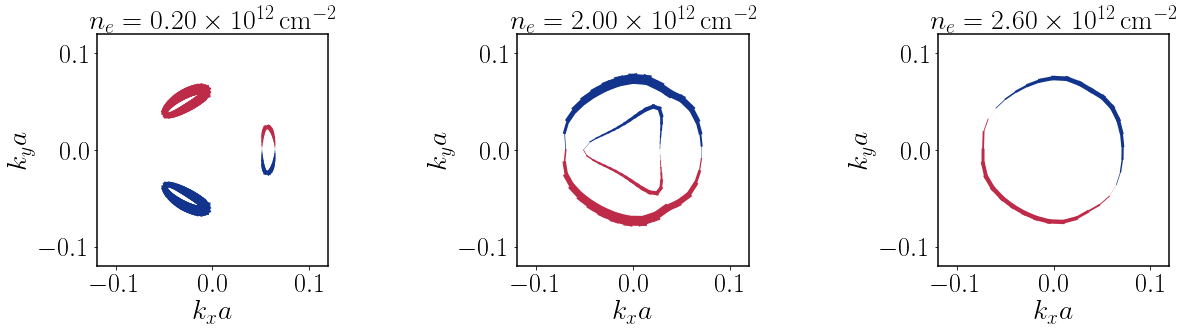

In [71]:
Ticks=True
Dl=69
nul=[0.2,2.0,2.6]
PsiD=PsiDe
lamdD=lamdDe

ind = np.where(np.abs(DlistABCA-Dl)<0.01)[0][0]
mull= np.array(fdrABCA[ind](nul))


from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=26)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (18.0, 5.2)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3)

mult=0.6

mu1=mull[0]
ax1=fig.add_subplot(gs[0,0])
plotOrder(Dl,mu1,PsiD,-0.65,ax1,True)
#ax1.set_xlabel(r"$k_xa$", fontsize=20)
#ax1.set_ylabel(r"$k_ya$", fontsize=20)
ax1.set_xlim([-0.12,0.12])
ax1.set_ylim([-0.12,0.12])
if Ticks:
    ax1.set_xlabel(r"$k_xa$", fontsize=28)
    ax1.set_ylabel(r"$k_ya$", fontsize=28)
    ax1.set_xticks([-0.1,0.0,0.1])
    ax1.set_yticks([-0.1,0.0,0.1])
else:
    ax1.set_xticks([])
    ax1.set_yticks([])
ax1.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(fdeABCA[ind](mu1)),fontsize=28)
ax1.set(adjustable='box', aspect='equal')


mu2=mull[1]
ax2=fig.add_subplot(gs[0,1])
plotOrder(Dl,mu2,PsiD,-0.2,ax2,True)
#ax2.set_xlabel(r"$k_xa$", fontsize=20)
#ax2.set_ylabel(r"$k_ya$", fontsize=20)
ax2.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(fdeABCA[ind](mu2)),fontsize=28)
ax2.set_xlim([-0.12,0.12])
ax2.set_ylim([-0.12,0.12])
if Ticks:
    ax2.set_xlabel(r"$k_xa$", fontsize=28)
    ax2.set_ylabel(r"$k_ya$", fontsize=28)
    ax2.set_xticks([-0.1,0.0,0.1])
    ax2.set_yticks([-0.1,0.0,0.1])
else:
    ax2.set_xticks([])
    ax2.set_yticks([])
ax2.set(adjustable='box', aspect='equal')


mu3=mull[2]
ax3=fig.add_subplot(gs[0,2])
plotOrder(Dl,mu3,PsiD,-0.7,ax3,True)
#ax3.set_xlabel(r"$k_xa$", fontsize=20)
#ax3.set_ylabel(r"$k_ya$", fontsize=20)
ax3.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(fdeABCA[ind](mu3)),fontsize=28)
ax3.set_xlim([-0.12,0.12])
ax3.set_ylim([-0.12,0.12])
if Ticks:
    ax3.set_xlabel(r"$k_xa$", fontsize=28)
    ax3.set_ylabel(r"$k_ya$", fontsize=28)
    ax3.set_xticks([-0.1,0.0,0.1])
    ax3.set_yticks([-0.1,0.0,0.1])
else:
    ax3.set_xticks([])
    ax3.set_yticks([])
ax3.set(adjustable='box', aspect='equal')


plt.tight_layout()
#plt.savefig("FSOrder.png", dpi=200)

In [28]:
densc

NameError: name 'densc' is not defined

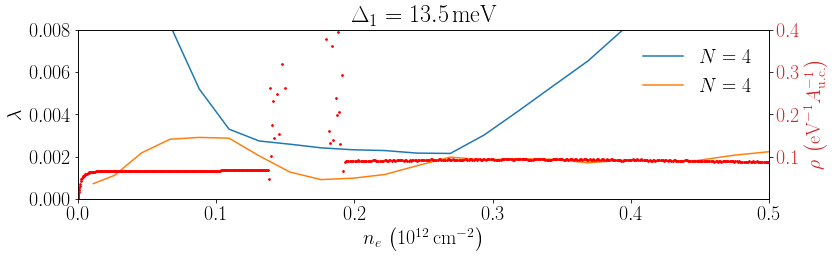

In [18]:
ml.rcParams['figure.figsize'] = (12.0, 4.0)
ml.rc('font', family='serif',size=20)
fig, ax=plt.subplots(1,1)
Dl=13.5
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inde = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
ax.plot(fdeABCA[ind](lamdDe[inde][1]),-lamdDe[inde][2][:,0],label=r'$N=4$')
ax.plot(fdeABCA[ind](lamdDe[inde][1]),-lamdDe[inde][2][:,2],label=r'$N=4$')
#ax.plot(fdeABCA[ind](lamdDe[inde][1]),-lamdDe[inde][3][:,0],label=r'$N=2$')
ax.set_xlim([0.0,0.5])
ax.set_ylim([0,0.008])
ax.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=20)
ax.set_ylabel(r"$\lambda$", fontsize=20)
ax.set_title('$\Delta_1=%.1f\,\mathrm{meV}$' %(Dl))
ax.legend(frameon=False,fontsize=20)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

a=2.46
Au = np.sqrt(3) * a**2 / 2
color = 'tab:red'
ax2.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$', color=color)
ax2.scatter(nuT[ind],Au*0.1*dos[ind],s=3,color='r')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks([0.1,0.2,0.3,0.4])
ax2.set_ylim([0,0.4])

plt.tight_layout()
#plt.savefig("Sup20ABCA.png",dpi=200)

In [250]:
ind1

array([ 61,  66,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 108, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
       298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 30

In [69]:
import seaborn as sns
vlag=sns.color_palette("vlag", 8)
col1 = ml.colors.to_rgb("#0A874F")
col2 = ml.colors.to_rgb("#1BA5B2")
col3 = ml.colors.to_rgb("#e4a60a")
col4 = ml.colors.to_rgb("#462d64")
col5 = ml.colors.to_rgb("#bd2b48")
col6 =ml.colors.to_rgb("#12348d")

(2.0, 4.0)

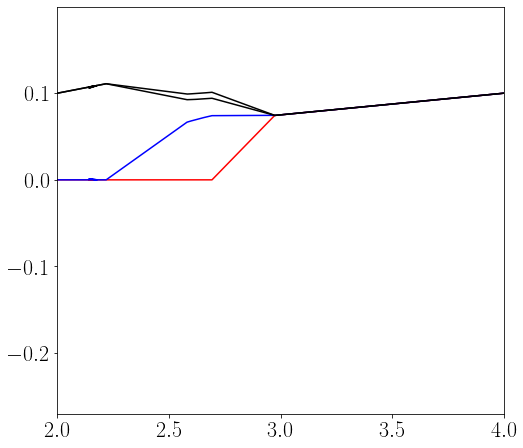

In [27]:
Dl=20
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
plt.plot(nuT[ind],0.1*nu1[ind],color='r')
plt.plot(nuT[ind],0.1*nu2[ind],color='b')
plt.plot(nuT[ind],0.1*nu3[ind],color='k')
plt.plot(nuT[ind],0.1*nu4[ind],color='k')
plt.xlim([2,4])

40.84222710205239 	 40.87999999999999
43.036939055871784 	 43.03999999999994
48.746715402928494 	 48.75999999999982
40.84222710205239 	 40.87999999999999
42.80711388901434 	 42.83999999999995
50.226198840080684 	 50.23999999999979
72.52792575206202 	 72.54000000000003
73.92341622551005 	 73.94000000000025
74.88886205179297 	 74.9000000000004
72.52792575206202 	 72.54000000000003
73.92341622551005 	 73.94000000000025
74.88886205179297 	 74.9000000000004


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:227: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:227: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


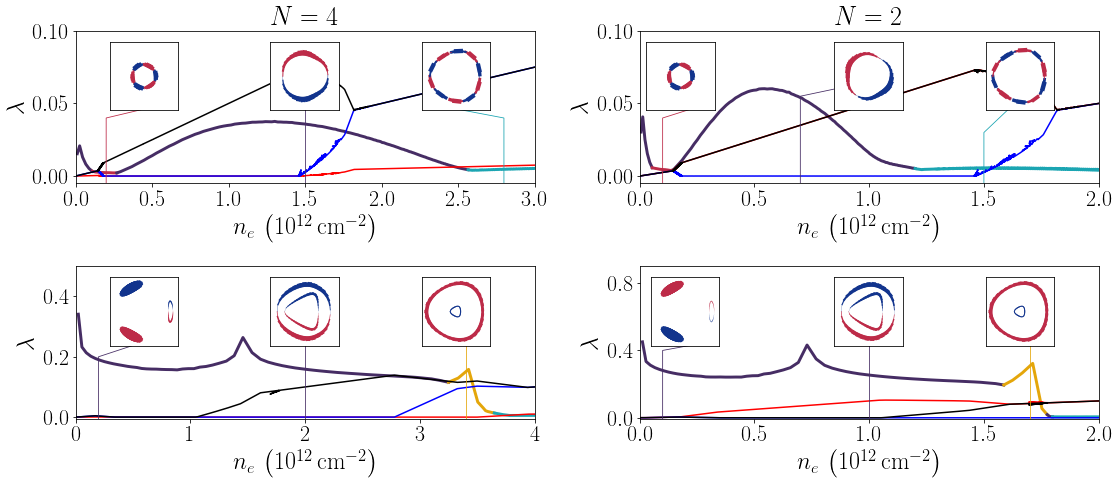

In [22]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=22)
ml.rcParams['figure.figsize'] = (16, 7.2)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 4, height_ratios=[1.0,1.0])

PsiD=PsiDe
lamdD=lamdDe

Dl=13.5
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.2,1.5,2.8]

mult = 0.6
ax1=fig.add_subplot(gs[0,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.0005)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][2][ind1[0]:ind1[1]+1,0],lw=2.95,color=col5)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[2]+1]),-lamdDe[inds][2][ind1[1]:ind1[2]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[2]:]),-lamdDe[inds][2][ind1[2]:,0],lw=2.95,color=col2)
ax1.plot(nuT[ind],0.01*nu1[ind],color='r')
ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
ax1.set_xlim([0,3.0])
ax1.set_ylim([-0.005,0.1])
ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu1,PsiD,0.0,axins2,True)
axins2.set_xlim([-0.06,0.06])
axins2.set_ylim([-0.06,0.06])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.04, 0.05], color=col5, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,0.0,axins3,True)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], nul[1]], [-0.05,0.06, 0.06],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2], 2.3], [-0.05,0.04, 0.05],  color=col2, lw=0.8)



ax2=fig.add_subplot(gs[0,2:4])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0009)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][3][ind1[0]:ind1[1]+1,0],lw=2.95,color=col5)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[2]+1]),-lamdDe[inds][3][ind1[1]:ind1[2]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[2]:]),-lamdDe[inds][3][ind1[2]:,0],lw=2.95,color=col2)
ax2.plot(nuT[ind],0.1*nu4[ind],color='r')
ax2.plot(nuT[ind],0.1*nu2[ind],color='b')
ax2.plot(nuT[ind],0.1*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,0.1])
ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,0.7,1.5])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.16,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,0.0,axins2,False)
axins2.set_xlim([-0.06,0.06])
axins2.set_ylim([-0.06,0.06])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.3], [-0.1,0.04, 0.05], color=col5, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,0.0,axins3,False)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], 1.0], [-0.05,0.055, 0.065],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], 1.7], [-0.05,0.03, 0.06],  color=col2, lw=0.8)



Dl=25
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.2,2.0,3.4]


ax1=fig.add_subplot(gs[1,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.009)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][2][ind1[0]:ind1[1]+1,0],lw=2.95,color=col3)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[1]:]),-lamdDe[inds][2][ind1[1]:,0],lw=2.95,color=col2)
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
ax1.plot(nuT[ind],0.01*nu1[ind],color='r')
ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlim([0,4.0])
ax1.set_ylim([-0.005,0.5])
#ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
mult = 0.3
plotOrder(Dl,mu1,PsiD,2*np.pi/3-0.4,axins2,True)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.2, 0.25], color=col4, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,-0.2,axins3,True)

axins3.set_xlim([-0.1,0.1])
axins3.set_ylim([-0.1,0.1])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], nul[1]], [-0.05,0.2, 0.25],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2],nul[2]], [-0.05,0.2, 0.25],  color=col3, lw=0.8)



ax2=fig.add_subplot(gs[1,2:4])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0055)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][3][ind1[0]:ind1[1]+1,0],lw=2.95,color=col3)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[2]+1]),-lamdDe[inds][3][ind1[1]:ind1[2]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[2]:]),-lamdDe[inds][3][ind1[2]:,0],lw=2.95,color=col2)
ax2.plot(nuT[ind],0.1*nu4[ind],color='r')
ax2.plot(nuT[ind],0.1*nu2[ind],color='b')
ax2.plot(nuT[ind],0.1*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,0.9])
ax2.set_yticks([0.0,0.4,0.8])
#ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,1.0,1.7])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.15,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,2*np.pi/3-0.4,axins2,False)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.3], [-0.1,0.4, 0.45], color=col4, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,-0.2,axins3,False)

axins3.set_xlim([-0.1,0.1])
axins3.set_ylim([-0.1,0.1])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], nul[1]], [-0.05,0.5, 0.6],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], nul[2]], [-0.05,0.5, 0.6],  color=col3, lw=0.8)
plt.tight_layout()
plt.savefig("SuperNorm.pdf")

67.6342583032061 	 67.68999999999996
0.0646989105232975 	 None
68.7732593736427 	 68.78999999999974
70.58972660988927 	 70.58999999999938
67.6342583032061 	 67.68999999999996
0.0646989105232975 	 None
68.7732593736427 	 68.78999999999974
68.9894628628742 	 68.9899999999997


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


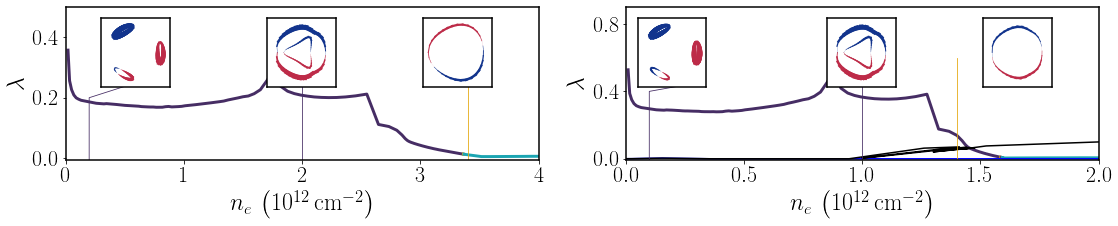

In [54]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=22)
ml.rcParams['figure.figsize'] = (16, 3.6)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 4)

PsiD=PsiDe
lamdD=lamdDe

Dl=69
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.2,2.0,3.4]


ax1=fig.add_subplot(gs[0,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.009)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][2][ind1[0]:ind1[1]+1,0],lw=2.95,color=col3)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[1]:]),-lamdDe[inds][2][ind1[1]:,0],lw=2.95,color=col2)
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
#ax1.plot(nuT[ind],0.01*nu1[ind],color='r')
#ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
#ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlim([0,4.0])
ax1.set_ylim([-0.005,0.5])
#ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
mult = 0.3
plotOrder(Dl,mu1,PsiD,2*np.pi/3-0.4,axins2,True)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.2, 0.25], color=col4, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,-0.2,axins3,True)

axins3.set_xlim([-0.1,0.1])
axins3.set_ylim([-0.1,0.1])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], nul[1]], [-0.05,0.2, 0.25],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2],nul[2]], [-0.05,0.2, 0.25],  color=col3, lw=0.8)



ax2=fig.add_subplot(gs[0,2:4])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0055)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][3][ind1[0]:ind1[1]+1,0],lw=2.95,color=col3)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[2]+1]),-lamdDe[inds][3][ind1[1]:ind1[2]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[2]:]),-lamdDe[inds][3][ind1[2]:,0],lw=2.95,color=col2)
#ax2.plot(nuT[ind],0.1*nu4[ind],color='r')
ax2.plot(nuT[ind],0.1*nu2[ind],color='b')
ax2.plot(nuT[ind],0.1*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,0.9])
ax2.set_yticks([0.0,0.4,0.8])
#ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,1.0,1.4])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.15,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,2*np.pi/3-0.4,axins2,False)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.3], [-0.1,0.4, 0.45], color=col4, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,-0.2,axins3,False)

axins3.set_xlim([-0.1,0.1])
axins3.set_ylim([-0.1,0.1])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], nul[1]], [-0.05,0.5, 0.6],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], nul[2]], [-0.05,0.5, 0.6],  color=col3, lw=0.8)
plt.tight_layout()
#plt.savefig("SuperNorm.pdf")

67.6342583032061 	 67.68999999999996
0.0646989105232975 	 None
68.7732593736427 	 68.78999999999974
71.47503048225073 	 71.4899999999992
67.6342583032061 	 67.68999999999996
0.0646989105232975 	 None
68.7732593736427 	 68.78999999999974
70.58972660988927 	 70.58999999999938


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


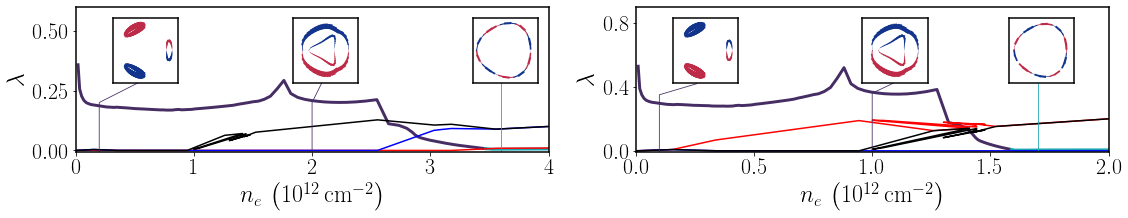

In [110]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=22)
ml.rcParams['figure.figsize'] = (16, 3.6)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 4)

PsiD=PsiDe
lamdD=lamdDe

Dl=69
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.2,2.0,3.6]


ax1=fig.add_subplot(gs[0,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.003)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
#ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][2][ind1[0]:ind1[1]+1,0],lw=2.95,color=col3)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[1]:]),-lamdDe[inds][2][ind1[1]:,0],lw=2.95,color=col2)
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
ax1.plot(nuT[ind],0.1*nu1[ind],color='r')
ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlim([0,4.0])
ax1.set_ylim([-0.005,0.6])
#ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
mult = 0.3
plotOrder(Dl,mu1,PsiD,-0.65,axins2,True)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.2, 0.3], color=col4, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.28,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,-0.1,axins3,True)

axins3.set_xlim([-0.1,0.1])
axins3.set_ylim([-0.1,0.1])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], nul[1]+0.1], [-0.05,0.2, 0.3],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.66,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,-0.3,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2],nul[2]], [-0.05,0.2, 0.3],  color=col2, lw=0.8)



ax2=fig.add_subplot(gs[0,2:4])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0055)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
#ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][3][ind1[0]:ind1[1]+1,0],lw=2.95,color=col3)
#ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[2]+1]),-lamdDe[inds][3][ind1[1]:ind1[2]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[1]:]),-lamdDe[inds][3][ind1[1]:,0],lw=2.95,color=col2)
ax2.plot(nuT[ind],0.2*nu4[ind],color='r')
ax2.plot(nuT[ind],0.2*nu1[ind],color='b')
ax2.plot(nuT[ind],0.2*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,0.9])
ax2.set_yticks([0.0,0.4,0.8])
#ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,1.0,1.7])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,np.pi/3-0.4,axins2,False)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.26], [-0.1,0.35, 0.42], color=col4, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.3,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,-0.2,axins3,False)

axins3.set_xlim([-0.1,0.1])
axins3.set_ylim([-0.1,0.1])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], nul[1]+0.2], [-0.05,0.36, 0.5],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.61,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,-0.3,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], nul[2]], [-0.05,0.5, 0.6],  color=col2, lw=0.8)
plt.tight_layout()
plt.savefig("SuperNormNew.pdf")

42.32035896439861 	 42.32999999999993
44.35212815739499 	 44.35999999999952
49.74415410225064 	 49.74999999999845
42.32035896439861 	 42.32999999999993
44.13837106656871 	 44.13999999999957
51.16002445267777 	 51.16999999999817
59.92577536323419 	 59.93000000000003
0.05813644591691669 	 0.03883129650996723
60.17507551279696 	 60.18000000000007
63.92182108557804 	 63.93000000000065
59.86984545729606 	 59.87000000000002
0.057133548567710836 	 0.041832010051051256
60.2570071498355 	 60.26000000000008
63.030125013734136 	 63.04000000000052


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:223: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:223: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


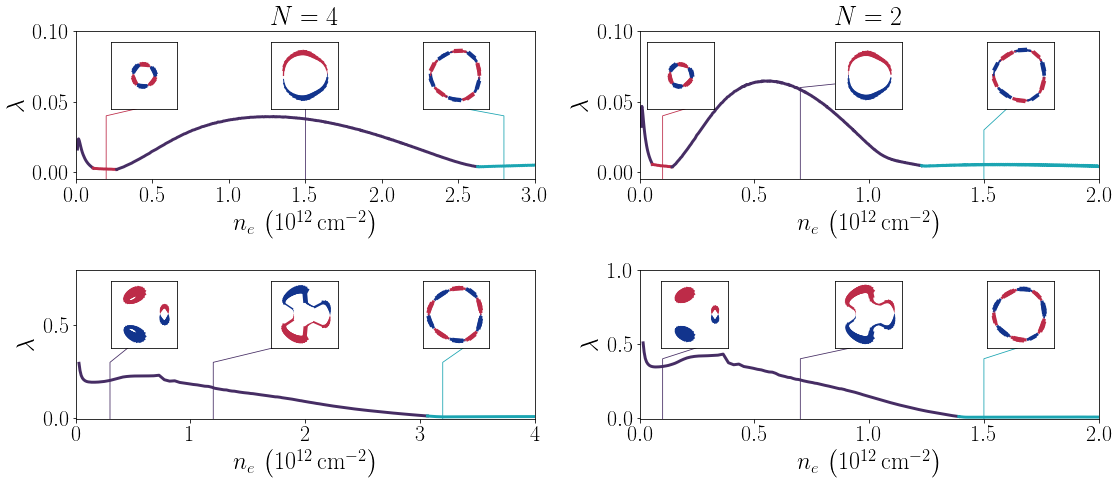

In [93]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=22)
ml.rcParams['figure.figsize'] = (16, 7.2)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 4, height_ratios=[1.0,1.0])

PsiD=PsiDe
lamdD=lamdDe

Dl=42
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.2,1.5,2.8]

mult = 0.6
ax1=fig.add_subplot(gs[0,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.0002)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][2][ind1[0]:ind1[1]+1,0],lw=2.95,color=col5)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[2]+1]),-lamdDe[inds][2][ind1[1]:ind1[2]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[2]:]),-lamdDe[inds][2][ind1[2]:,0],lw=2.95,color=col2)
#ax1.plot(nuT[ind],0.1*nu1[ind],color='r')
#ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
#ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
ax1.set_xlim([0,3.0])
ax1.set_ylim([-0.005,0.1])
ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu1,PsiD,np.pi/3,axins2,True)
axins2.set_xlim([-0.06,0.06])
axins2.set_ylim([-0.06,0.06])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.04, 0.05], color=col5, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,0.6,axins3,True)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], nul[1]], [-0.05,0.06, 0.07],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2], 2.3], [-0.05,0.04, 0.05],  color=col2, lw=0.8)



ax2=fig.add_subplot(gs[0,2:4])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0004)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:ind1[1]+1]),-lamdDe[inds][3][ind1[0]:ind1[1]+1,0],lw=2.95,color=col5)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[1]:ind1[3]+1]),-lamdDe[inds][3][ind1[1]:ind1[3]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[3]:]),-lamdDe[inds][3][ind1[3]:,0],lw=2.95,color=col2)
#ax2.plot(nuT[ind],0.1*nu4[ind],color='r')
#ax2.plot(nuT[ind],0.1*nu2[ind],color='b')
#ax2.plot(nuT[ind],0.1*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,0.1])
ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,0.7,1.5])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.16,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,0.6,axins2,False)
axins2.set_xlim([-0.06,0.06])
axins2.set_ylim([-0.06,0.06])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.3], [-0.1,0.04, 0.05], color=col5, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,0.6,axins3,False)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], 1.0], [-0.05,0.06, 0.065],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], 1.7], [-0.05,0.03, 0.06],  color=col2, lw=0.8)



Dl=60
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.3,1.2,3.2]

mult = 0.5
ax1=fig.add_subplot(gs[1,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.0055)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:]),-lamdDe[inds][2][ind1[0]:,0],lw=2.95,color=col2)
#ax1.plot(nuT[ind],0.01*nu1[ind],color='r')
#ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
#ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
ax1.set_xlim([0,4.0])
ax1.set_ylim([-0.005,0.8])
#ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu1,PsiD,0.5*np.pi/3,axins2,True)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.3, 0.45], color=col4, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,2*np.pi/3+0.3,axins3,True)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], 2.0], [-0.05,0.3, 0.42],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2], 3.5], [-0.05,0.3, 0.43],  color=col2, lw=0.8)



ax2=fig.add_subplot(gs[1,2:])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0055)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:]),-lamdDe[inds][3][ind1[0]:,0],lw=2.95,color=col2)
#ax2.plot(nuT[ind],0.1*nu4[ind],color='r')
#ax2.plot(nuT[ind],0.1*nu2[ind],color='b')
#ax2.plot(nuT[ind],0.1*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,1.0])
#ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,0.7,1.5])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.13,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,2*np.pi/3+0.4,axins2,False)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.3], [-0.1,0.4, 0.50], color=col4, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,np.pi/3-0.2,axins3,False)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], 1.0], [-0.05,0.4, 0.5],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,-1.0,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], 1.7], [-0.05,0.4, 0.5],  color=col2, lw=0.8)

plt.tight_layout()
plt.savefig("SuperTop.pdf")

In [161]:
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]

In [160]:
Dl=42

In [182]:
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0004)

In [183]:
ind1

(array([ 19,  47,  48, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583,
        584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 596]),)

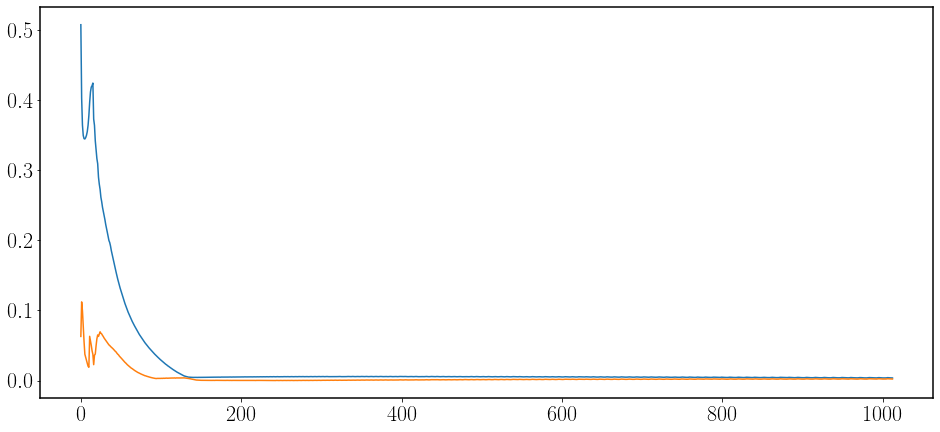

In [159]:
plt.plot(-lamdDe[inds][3][:,0])
plt.plot(-lamdDe[inds][3][:,2])
#plt.plot(lamdDe[inds][2][:,0][ind1[0]:ind1[1]])

59.92577536323419 	 59.94000000000003
60.17507551279696 	 60.18000000000007
63.92182108557804 	 63.94000000000066
59.86984545729606 	 59.880000000000024
60.2570071498355 	 60.26000000000008
63.030125013734136 	 63.04000000000052


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:111: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


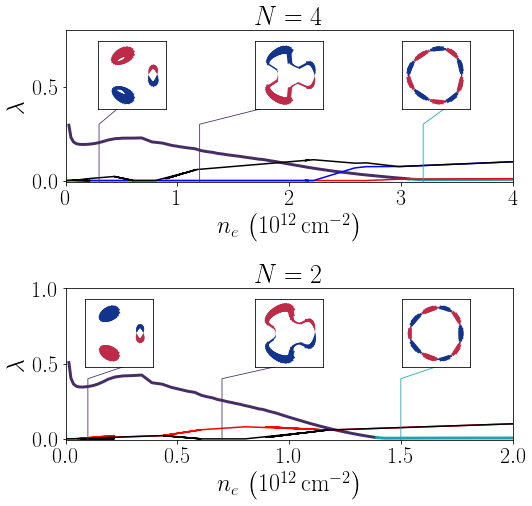

In [26]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=22)
ml.rcParams['figure.figsize'] = (8, 7.5)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2, height_ratios=[1.0,1.0])

Dl=20
ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
inds = np.where(np.abs(np.abs(Dl)-DlmbListe)<0.01)[0][0]
nul=[0.3,1.2,3.2]

mult = 0.5
ax1=fig.add_subplot(gs[0,:2])
ind1 = np.where(np.abs(lamdDe[inds][2][:,0]-lamdDe[inds][2][:,2])<0.0055)[0]
ax1.plot(fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][2][:ind1[0]+1,0],lw=2.95,color=col4)
ax1.plot(fdeABCA[ind](lamdDe[inds][1][ind1[0]:]),-lamdDe[inds][2][ind1[0]:,0],lw=2.95,color=col2)
ax1.plot(nuT[ind],0.01*nu1[ind],color='r')
ax1.plot(nuT[ind],0.1*nu2[ind],color='b')
ax1.plot(nuT[ind],0.1*nu3[ind],color='k')
ax1.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax1.set_ylabel(r"$\lambda$", fontsize=24)
ax1.set_xlim([0,4.0])
ax1.set_ylim([-0.005,0.8])
ax1.set_title(r'$N=4$',fontsize=26)

mull= fdrABCA[ind](nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax1, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.1,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu1,PsiD,-2*np.pi/3-0.3,axins2,True)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax1.plot([nul[0],nul[0], 0.6], [-0.1,0.3, 0.45], color=col4, lw=0.8)

axins3 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu2,PsiD,2*np.pi/3+0.3,axins3,True)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax1.plot([nul[1],nul[1], 2.0], [-0.05,0.3, 0.42],  color=col4, lw=0.8)

axins4 = inset_axes(ax1, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax1.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,True)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax1.plot([nul[2],nul[2], 3.5], [-0.05,0.3, 0.43],  color=col2, lw=0.8)



ax2=fig.add_subplot(gs[1,0:2])
ind1 = np.where(np.abs(lamdDe[inds][3][:,0]-lamdDe[inds][3][:,2])<0.0055)[0]
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][:ind1[0]+1]),-lamdDe[inds][3][:ind1[0]+1,0],lw=2.95,color=col4)
ax2.plot(0.5*fdeABCA[ind](lamdDe[inds][1][ind1[0]:]),-lamdDe[inds][3][ind1[0]:,0],lw=2.95,color=col2)
ax2.plot(nuT[ind],0.1*nu4[ind],color='r')
#ax2.plot(nuT[ind],0.1*nu2[ind],color='b')
ax2.plot(nuT[ind],0.1*nu3[ind],color='k')
ax2.set_xlabel(r"$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$", fontsize=24)
ax2.set_ylabel(r"$\lambda$", fontsize=24)
ax2.set_xlim([0,2.0])
ax2.set_ylim([-0.005,1.0])
ax2.set_title(r'$N=2$',fontsize=26)

nul=np.array([0.1,0.7,1.5])
mull= fdrABCA[ind](2*nul)
mu1=mull[0]
mu2=mull[1]
mu3=mull[2]
axins2 = inset_axes(ax2, width="100%", height="100%", loc='upper left',bbox_to_anchor=(-0.13,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu1,PsiD,2*np.pi/3-0.1,axins2,False)
axins2.set_xlim([-0.08,0.08])
axins2.set_ylim([-0.08,0.08])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set(adjustable='box', aspect='equal')
ax2.plot([nul[0],nul[0], 0.3], [-0.1,0.4, 0.50], color=col4, lw=0.8)

axins3 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.25,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu2,PsiD,np.pi/3-0.2,axins3,False)

axins3.set_xlim([-0.08,0.08])
axins3.set_ylim([-0.08,0.08])
axins3.set_xticks([])
axins3.set_yticks([])
axins3.set(adjustable='box', aspect='equal')
ax2.plot([nul[1],nul[1], 1.0], [-0.05,0.4, 0.5],  color=col4, lw=0.8)

axins4 = inset_axes(ax2, width="100%", height="100%", loc='upper left',\
                    bbox_to_anchor=(0.58,1-0.45,.45,.45), bbox_transform=ax2.transAxes)
plotOrder(Dl,mu3,PsiD,0.0,axins4,False)
axins4.set_xlim([-0.1,0.1])
axins4.set_ylim([-0.1,0.1])
axins4.set_xticks([])
axins4.set_yticks([])
axins4.set(adjustable='box', aspect='equal')
ax2.plot([nul[2],nul[2], 1.7], [-0.05,0.4, 0.5],  color=col2, lw=0.8)

plt.tight_layout()
plt.savefig("SuperTop.pdf")

(0.0, 3.0)

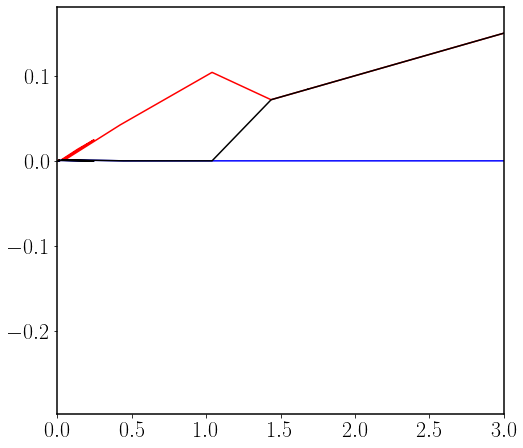

In [345]:
plt.plot(nuT[ind],0.1*nu4[ind],color='r')
plt.plot(nuT[ind],0.1*nu1[ind],color='b')
plt.plot(nuT[ind],0.1*nu3[ind],color='k')
plt.xlim([0.0,3.0])

In [40]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/SuperABCA/Data/"
with open(dpath+'LambdaPerfNestElec.npy', 'rb') as f:
    lmbT = np.load(f,allow_pickle=True)

In [41]:
dlist=np.array([float(lmbT[0][i][0]) for i in range(len(lmbT[0]))])
mulist=np.array([float(lmbT[0][i][1]) for i in range(len(lmbT[0]))])
lmd4list=np.array([lmbT[1][i][0] for i in range(len(lmbT[1]))])
lmd2list=np.array([lmbT[1][i][2] for i in range(len(lmbT[1]))])
psi4list=np.array([lmbT[1][i][1] for i in range(len(lmbT[1]))])
psi2list=np.array([lmbT[1][i][3] for i in range(len(lmbT[1]))])
sizes=np.array([lmbT[1][i][4] for i in range(len(lmbT[1]))])
indsc=np.array([lmbT[1][i][5] for i in range(len(lmbT[1]))])

In [42]:
def plotOrder(Dl,mu,psi,sizes,indsc,phase,ax):
    kpl=kp(Dl,mu,sizes,indsc)
    if phase!=None:
        psil=(np.cos(phase)*psi[:,0]+np.sin(phase)*psi[:,1])*psi[:,0].shape[0]/np.linalg.norm(np.cos(phase)*psi[:,0]+np.sin(phase)*psi[:,1])
    else:
        psil=psi[:,0]*psi[:,0].shape[0]/np.linalg.norm(psi[:,0])
    krx = kpl[0]
    kry = kpl[1]
    if kpl[3]==2:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
    elif kpl[3]==1:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
    elif kpl[3]==0:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[1],sizes[2]-sizes[1],krx,kry,psil,ax)
    else:
        FSOrder(0,sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[0],sizes[1]-sizes[0],krx,kry,psil,ax)
        FSOrder(sizes[1],sizes[2]-sizes[1],krx,kry,psil,ax)
        FSOrder(sizes[2],sizes[3]-sizes[2],krx,kry,psil,ax)
        FSOrder(sizes[3],sizes[4]-sizes[3],krx,kry,psil,ax)
        FSOrder(sizes[4],sizes[5]-sizes[4],krx,kry,psil,ax)
    return krx,kry

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


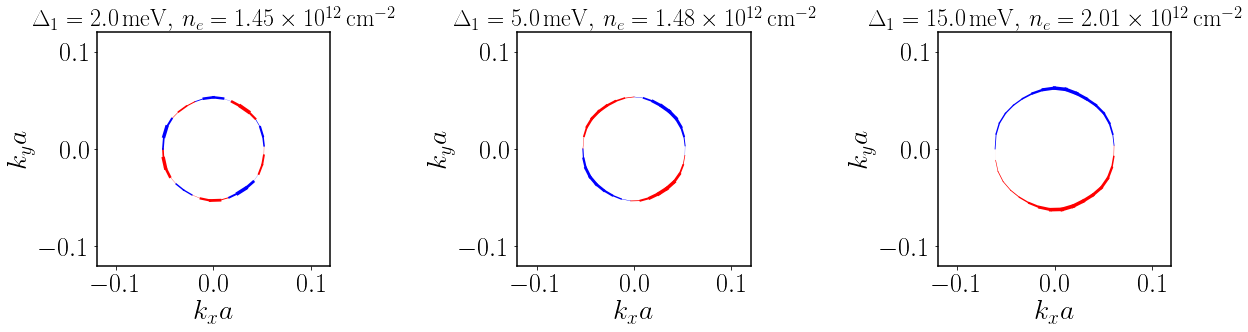

In [55]:
Ticks=True
Dl=[2,5,15]


from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=26)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (18.0, 5.2)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3)


indl=np.where(np.abs(Dl[0]-dlist)<1e-6)[0][0]
ind = np.where(np.abs(DlistABCA-Dl[0])<0.01)[0][0]
ax1=fig.add_subplot(gs[0,0])
plotOrder(Dl[0],mulist[indl],psi2list[indl],sizes[indl],indsc[indl],0.0,ax1)
#ax1.set_xlabel(r"$k_xa$", fontsize=20)
#ax1.set_ylabel(r"$k_ya$", fontsize=20)
ax1.set_xlim([-0.12,0.12])
ax1.set_ylim([-0.12,0.12])
if Ticks:
    ax1.set_xlabel(r"$k_xa$", fontsize=28)
    ax1.set_ylabel(r"$k_ya$", fontsize=28)
    ax1.set_xticks([-0.1,0.0,0.1])
    ax1.set_yticks([-0.1,0.0,0.1])
else:
    ax1.set_xticks([])
    ax1.set_yticks([])
ax1.set_title(r"$\Delta_1=%.1f\,\mathrm{meV}, \,n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(Dl[0],fdeABCA[ind](mulist[indl])),fontsize=24)
ax1.set(adjustable='box', aspect='equal')


indl=np.where(np.abs(Dl[1]-dlist)<1e-6)[0][0]
ind = np.where(np.abs(DlistABCA-Dl[1])<0.01)[0][0]
ax2=fig.add_subplot(gs[0,1])
plotOrder(Dl[1],mulist[indl],psi2list[indl],sizes[indl],indsc[indl],0.35,ax2)
#ax2.set_xlabel(r"$k_xa$", fontsize=20)
#ax2.set_ylabel(r"$k_ya$", fontsize=20)
ax2.set_title(r"$\Delta_1=%.1f\,\mathrm{meV}, \,n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(Dl[1],fdeABCA[ind](mulist[indl])),fontsize=24)
ax2.set_xlim([-0.12,0.12])
ax2.set_ylim([-0.12,0.12])
if Ticks:
    ax2.set_xlabel(r"$k_xa$", fontsize=28)
    ax2.set_ylabel(r"$k_ya$", fontsize=28)
    ax2.set_xticks([-0.1,0.0,0.1])
    ax2.set_yticks([-0.1,0.0,0.1])
else:
    ax2.set_xticks([])
    ax2.set_yticks([])
ax2.set(adjustable='box', aspect='equal')


indl=np.where(np.abs(Dl[2]-dlist)<1e-6)[0][0]
ind = np.where(np.abs(DlistABCA-Dl[2])<0.01)[0][0]
ax3=fig.add_subplot(gs[0,2])
plotOrder(Dl[2],mulist[indl],psi2list[indl],sizes[indl],indsc[indl],0.65,ax3)
#ax3.set_xlabel(r"$k_xa$", fontsize=20)
#ax3.set_ylabel(r"$k_ya$", fontsize=20)
ax3.set_title(r"$\Delta_1=%.1f\,\mathrm{meV}, \,n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(Dl[2],fdeABCA[ind](mulist[indl])),fontsize=24)
ax3.set_xlim([-0.12,0.12])
ax3.set_ylim([-0.12,0.12])
if Ticks:
    ax3.set_xlabel(r"$k_xa$", fontsize=28)
    ax3.set_ylabel(r"$k_ya$", fontsize=28)
    ax3.set_xticks([-0.1,0.0,0.1])
    ax3.set_yticks([-0.1,0.0,0.1])
else:
    ax3.set_xticks([])
    ax3.set_yticks([])
ax3.set(adjustable='box', aspect='equal')


plt.tight_layout()
plt.savefig("FSOrder.png", dpi=200)

In [22]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/SuperABCA/Data/"
with open(dpath+'XiD20Mu2078S.npy', 'rb') as f:
    xmf = np.real(np.load(f))
xmf = np.reshape(xmf, (int(np.sqrt(xmf.shape[0])),int(np.sqrt(xmf.shape[0])),3))

In [23]:
from scipy import interpolate
xif = interpolate.RectBivariateSpline(xmf[0,:,0], xmf[0,:,0], -xmf[:,:,2].T)

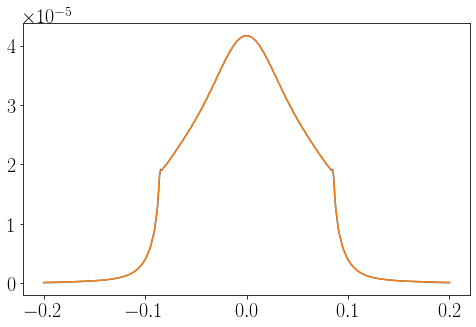

In [31]:
kx=np.linspace(-0.2,0.2,400)
ky=np.zeros(kx.shape)
plt.plot(kx, xif.ev(kx,ky))
ang=5*2*np.pi/6
plt.plot(kx, xif.ev(np.cos(ang)*kx-np.sin(ang)*ky,np.sin(ang)*kx+np.cos(ang)*ky))

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


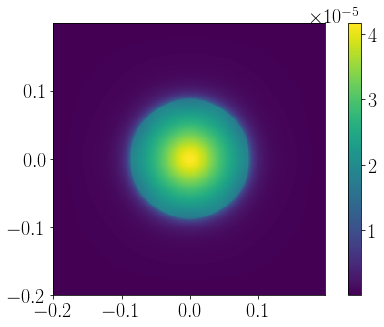

In [18]:
fig, ax=plt.subplots(1,1)
pc1=ax.pcolormesh(xif[:,:,0],xif[:,:,1],-np.real(xif[:,:,2]))
ax.set(adjustable='box', aspect='equal')
plt.colorbar(pc1)
plt.show()

In [20]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/SuperABCA/Data/"
with open(dpath+'XiD40Mu40WWave.npy', 'rb') as f:
    xm=np.real(np.load(f))
with open(dpath+'XiD40Mu40.npy', 'rb') as f:
    xmf=np.real(np.load(f))

In [21]:
xm=np.concatenate((xm, np.array([xm[:,0]*np.cos(np.pi/3)+xm[:,1]*np.sin(np.pi/3),
                                 -xm[:,0]*np.sin(np.pi/3)+xm[:,1]*np.cos(np.pi/3),xm[:,2]]).T,
                 np.array([xm[:,0]*np.cos(2*np.pi/3)+xm[:,1]*np.sin(2*np.pi/3),
                                 -xm[:,0]*np.sin(2*np.pi/3)+xm[:,1]*np.cos(2*np.pi/3),xm[:,2]]).T,
                   np.array([xm[:,0]*np.cos(np.pi)+xm[:,1]*np.sin(np.pi),
                                 -xm[:,0]*np.sin(np.pi)+xm[:,1]*np.cos(np.pi),xm[:,2]]).T,
                  np.array([xm[:,0]*np.cos(4*np.pi/3)+xm[:,1]*np.sin(4*np.pi/3),
                                 -xm[:,0]*np.sin(4*np.pi/3)+xm[:,1]*np.cos(4*np.pi/3),xm[:,2]]).T,
                   np.array([xm[:,0]*np.cos(5*np.pi/3)+xm[:,1]*np.sin(5*np.pi/3),
                                 -xm[:,0]*np.sin(5*np.pi/3)+xm[:,1]*np.cos(5*np.pi/3),xm[:,2]]).T))
xmf=np.concatenate((xmf, np.array([xmf[:,0]*np.cos(np.pi/3)+xmf[:,1]*np.sin(np.pi/3),
                                 -xmf[:,0]*np.sin(np.pi/3)+xmf[:,1]*np.cos(np.pi/3),xmf[:,2]]).T,
                 np.array([xmf[:,0]*np.cos(2*np.pi/3)+xmf[:,1]*np.sin(2*np.pi/3),
                                 -xmf[:,0]*np.sin(2*np.pi/3)+xmf[:,1]*np.cos(2*np.pi/3),xmf[:,2]]).T,
                   np.array([xmf[:,0]*np.cos(np.pi)+xmf[:,1]*np.sin(np.pi),
                                 -xmf[:,0]*np.sin(np.pi)+xmf[:,1]*np.cos(np.pi),xmf[:,2]]).T,
                  np.array([xmf[:,0]*np.cos(4*np.pi/3)+xmf[:,1]*np.sin(4*np.pi/3),
                                 -xmf[:,0]*np.sin(4*np.pi/3)+xmf[:,1]*np.cos(4*np.pi/3),xmf[:,2]]).T,
                   np.array([xmf[:,0]*np.cos(5*np.pi/3)+xmf[:,1]*np.sin(5*np.pi/3),
                                 -xmf[:,0]*np.sin(5*np.pi/3)+xmf[:,1]*np.cos(5*np.pi/3),xmf[:,2]]).T))

In [22]:
Dl=40
Nmax=2000
kmax=0.20
Tc = 0.015

In [23]:
kr, st = np.linspace(-kmax,kmax, Nmax, retstep=True, endpoint=False)
KY, KX = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(getBMatrixABCA(KX, KY, Dl, 0.0, 1))

In [24]:
def FD(en, mu, T):
    return 0.5*(1-np.tanh((en-mu)/(2*T)))

def DOS(en, mu, T):
    dmu = 0.001
    return (st**2/(2*np.pi)**2)*np.sum((FD(en,mu+dmu,T)-FD(en,mu-dmu,T))/(2*dmu))

muc=40
enb = w[:,:,4]
dsl = DOS(w[:,:,4],muc,Tc)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/home/aghazary/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fi

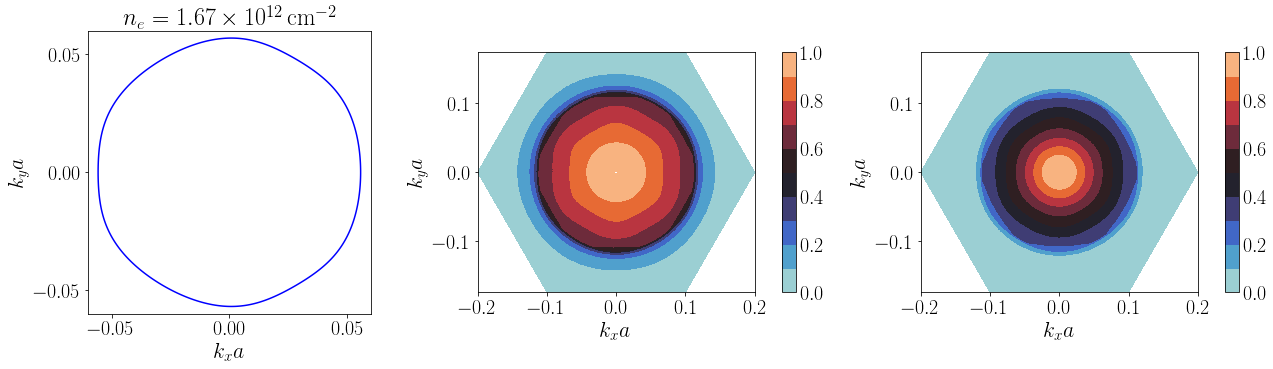

In [25]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (20.0, 5.2)
fig = plt.figure(constrained_layout=True)
gs1 = GridSpec(1, 1, right=0.33)

import seaborn as sns
cmap2=sns.color_palette("icefire", as_cmap=True)

ind = np.where(np.abs(DlistABCA-Dl)<0.01)[0][0]
ax1=fig.add_subplot(gs1[0,0])
ax1.contour(KX,KY,enb, [muc],colors='b')
ax1.set_xlabel(r"$k_xa$", fontsize=22)
ax1.set_ylabel(r"$k_ya$", fontsize=22)
ax1.set_xlim([-0.06,0.06])
ax1.set_ylim([-0.06,0.06])
ax1.set_yticks([-0.05,0,0.05])
ax1.set(adjustable='box', aspect='equal')
ax1.set_title(r"$n_e=%.2f\times10^{12}\, {\rm cm}^{-2}$" %(fdeABCA[ind](muc)))

gs = GridSpec(1, 2,left=0.4)
gs.update(wspace=0.6, hspace=0.4)
ax2=fig.add_subplot(gs[0, 0])
cbarticks=np.arange(0.0,1.05,0.1)
#cmap = plt.get_cmap('coolwarm')
pc1=ax2.tricontourf(np.real(xm[:,0]),np.real(xm[:,1]),-np.real(xm[:,2])/dsl,cbarticks, cmap=cmap2)
ax2.set_xlabel(r"$k_xa$", fontsize=22)
ax2.set_ylabel(r"$k_ya$", fontsize=22)
axins = inset_axes(ax2, width="5%", height="100%", bbox_to_anchor=(0.15, 0., 1.0, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0)
cbar1=plt.colorbar(pc1, cax=axins)
cbar1.ax.tick_params(size=0)
ax2.set(adjustable='box', aspect='equal')

ax3=fig.add_subplot(gs[0, 1])
cbarticks=np.arange(0.0,1.05,0.1)
#cmap = plt.get_cmap('coolwarm')
pc2=ax3.tricontourf(np.real(xmf[:,0]),np.real(xmf[:,1]),-np.real(xmf[:,2])/dsl,cbarticks, cmap=cmap2)
ax3.set_xlabel(r"$k_xa$", fontsize=22)
ax3.set_ylabel(r"$k_ya$", fontsize=22)
axins = inset_axes(ax3, width="5%", height="100%", bbox_to_anchor=(0.15, 0., 1.0, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0)
cbar2=plt.colorbar(pc2, cax=axins)
cbar2.ax.tick_params(size=0)
ax3.set(adjustable='box', aspect='equal')
#ax1.text(-0.09,0.054, r"{\bf(a)}", fontsize=26, weight='bold')
#ax2.text(-0.235,0.115, r"{\bf(b)}", fontsize=26, weight='bold')
#ax3.text(-0.235,0.115, r"{\bf(c)}", fontsize=26, weight='bold')
plt.savefig("Susc2DMu3896.png",dpi=200)

In [26]:
from scipy import interpolate
kx=np.linspace(0,0.16,400)
ky=np.zeros(kx.shape)
ptx0=interpolate.griddata((xm[:,0],xm[:,1]), -np.real(xm[:,2])/dsl, (kx,ky))
ptx=interpolate.griddata((xmf[:,0],xmf[:,1]), -np.real(xmf[:,2])/dsl, (kx,ky))
kx1=np.cos(np.pi/6)*kx
ky1=np.sin(np.pi/6)*kx
pty0=interpolate.griddata((xm[:,0],xm[:,1]), -np.real(xm[:,2])/dsl, (kx1,ky1))
pty=interpolate.griddata((xmf[:,0],xmf[:,1]), -np.real(xmf[:,2])/dsl, (kx1,ky1))

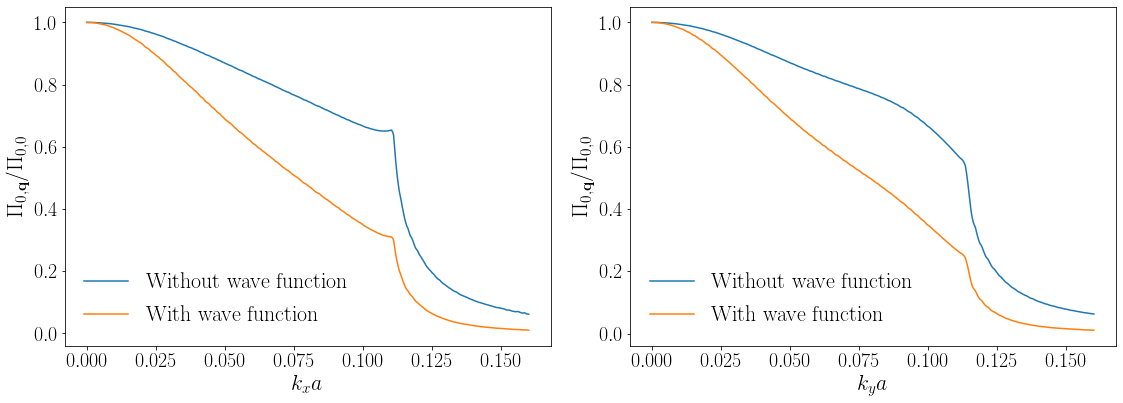

In [27]:
ml.rcParams['figure.figsize'] = (16.0, 6.0)
ml.rc('font', family='serif',size=20)
fig, (ax1, ax2)=plt.subplots(1,2)
ax1.plot(kx,ptx0, label=r'Without wave function')
ax1.plot(kx,ptx, label=r'With wave function')
ax1.set_xlabel(r'$k_xa$', fontsize=22)
ax1.set_ylabel(r"$\Pi_{0,\mathbf{q}}/\Pi_{0,0}$",fontsize=22)
ax1.legend(frameon=False,fontsize=22)


ax2.plot(kx,pty0, label=r'Without wave function')
ax2.plot(kx,pty, label=r'With wave function')
ax2.set_xlabel(r'$k_ya$',fontsize=22)
ax2.set_ylabel(r"$\Pi_{0,\mathbf{q}}/\Pi_{0,0}$",fontsize=22)
ax2.legend(frameon=False,fontsize=22)
plt.tight_layout()
plt.savefig("SuscComp.png",dpi=200)

(-0.08, 0.08)

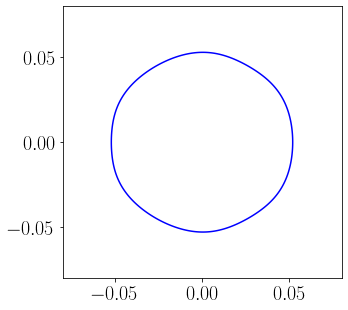

In [74]:
ml.rcParams['figure.figsize'] = (5.0, 5.0)
plt.contour(KX,KY,enb, [22.78],colors='b')
plt.xlim([-0.08,0.08])
plt.ylim([-0.08,0.08])

In [75]:
fdeABCA[40](22.78)

array(1.44993922)